In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro, spearmanr, chi2_contingency,ttest_ind
from sklearn.datasets import load_wine, make_classification
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Pre defined dataset in sklearn
wine = load_wine()

In [3]:
# creating different data frame
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

In [4]:
data, target = make_classification(n_samples=400, n_features = 5, n_classes=2)

In [5]:
df = pd.DataFrame(data, columns= [f"feature{i}" for i in range(1,6)])
df["target"] = target

In [15]:
wine = wine_df.copy()

In [7]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-0.152907,1.922005,0.239223,-1.560454,-1.190211,1
1,-0.240570,-1.475390,0.944994,2.285713,1.272683,1
2,1.013379,-1.034107,-1.277887,-0.268087,0.274799,0
3,-1.115366,-0.866504,2.446912,3.165985,1.349310,1
4,-0.886756,0.420764,-1.102179,-1.454459,-0.627847,0


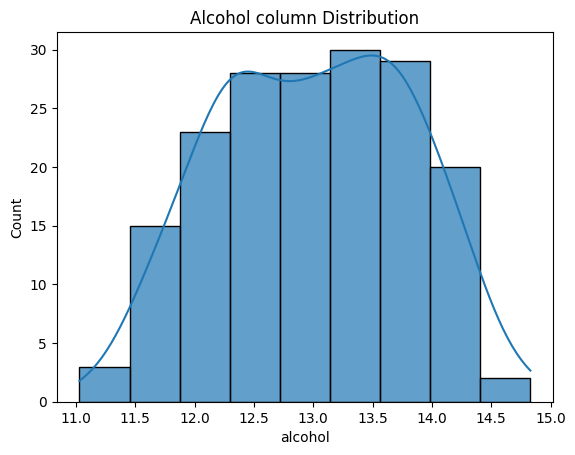

In [17]:
# first dataframe
plt.title("Alcohol column Distribution")
sns.histplot(wine["alcohol"], kde = True, alpha = 0.7)
plt.show()

In [19]:
# H0 -> Data is normally distributed
# Ha -> Data is not normally distributed

# checking whether to accpet the null hypothesis or reject it.
sh_stat, sh_p = shapiro(wine["alcohol"])

print("Shapiro statistical value: ", sh_stat)
print("Shapiro p_value: ", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (accepting h0)")
else:
    print("Data is not normally distributed (rejecting h0)")


Shapiro statistical value:  0.981804609298706
Shapiro p_value:  0.020050711929798126
Data is not normally distributed (rejecting h0)


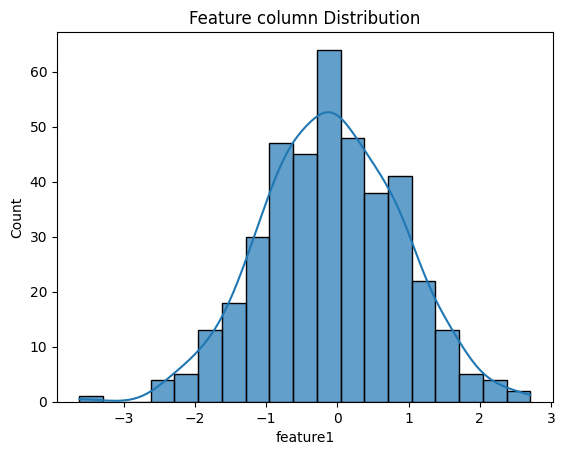

In [20]:
# second data frome 
plt.title("Feature1 column Distribution")
sns.histplot(df["feature1"], kde = True, alpha = 0.7)
plt.show()

In [29]:
# H0 -> Data is normally distributed
# Ha -> Data is not normally distributed

# checking whether to accpet the null hypothesis or reject it.
sh_stat, sh_p = shapiro(df["feature1"])

print("Shapiro statistical value: %.5f" %sh_stat)
print("Shapiro p_value: %.5f" %sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (accepting h0)")
else:
    print("Data is not normally distributed (rejecting h0)")

Shapiro statistical value: 0.99807
Shapiro p_value: 0.93440
Data is normally distributed (accepting h0)


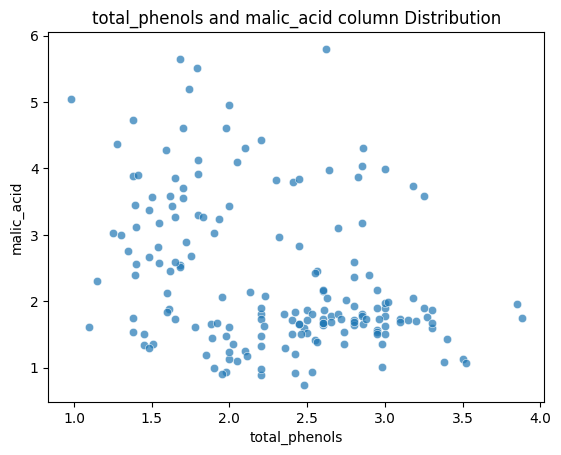

In [30]:
# third dataframe 
plt.title("total_phenols and malic_acid column Distribution")
sns.scatterplot(x = wine["total_phenols"],y = wine["malic_acid"], alpha = 0.7)
plt.show()

In [38]:
# H0 -> total_phenols and malic acid are independent
# Ha -> total_phenols and malic acid are not independent

# checking whether to accpet the null hypothesis or reject it.
sh_stat, sh_p = spearmanr(wine["total_phenols"], wine["malic_acid"])

print("Spearman statistical value: %.5f" %sh_stat)
print("Spearman p_value: %.5f" %sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Total_phenol and malic_acid are independent(accepting h0)")
else:
    print("Total_phenol and malic_acid are not independent (rejecting h0)")

Spearman statistical value: -0.28022
Spearman p_value: 0.00015
Total_phenol and malic_acid are not independent (rejecting h0)


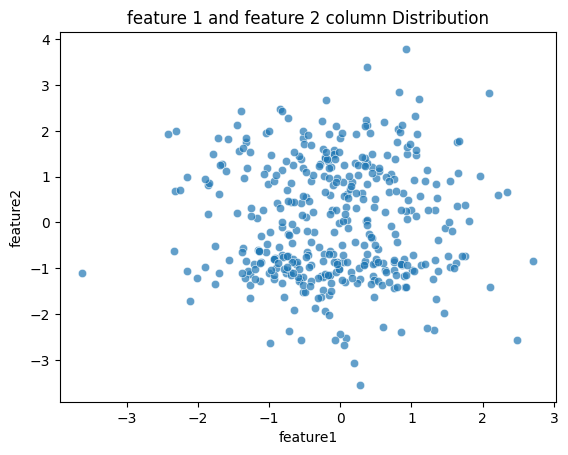

In [40]:
# fourth dataframe 
plt.title("feature 1 and feature 2 column Distribution")
sns.scatterplot(x = df["feature1"],y = df["feature2"], alpha = 0.7)
plt.show()

In [41]:
# H0 -> feature 1 and feature2 acid are independent
# Ha ->  feature 1 and feature2 acid are not independent

# checking whether to accpet the null hypothesis or reject it.
sh_stat, sh_p = spearmanr(df["feature1"], df["feature2"])

print("Spearman statistical value: %.5f" %sh_stat)
print("Spearman p_value: %.5f" %sh_p)

alpha = 0.05
if sh_p > alpha:
    print("feature 1 and feature2 are independent(accepting h0)")
else:
    print("feature 1 and feature2 are not independent (rejecting h0)")

Spearman statistical value: 0.01178
Spearman p_value: 0.81426
feature 1 and feature2 are independent(accepting h0)


### Example 5

In [52]:
cat = pd.cut(wine["proanthocyanins"], bins = 4, labels = [0,1,2,3])
cat

0      2
1      1
2      3
3      2
4      1
      ..
173    0
174    1
175    1
176    1
177    1
Name: proanthocyanins, Length: 178, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [53]:
wine["proanthocyanins"] = cat
#wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,c,0.28,2,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,c,0.26,1,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,c,0.30,3,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,c,0.24,2,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,B,0.39,1,4.32,1.04,2.93,735.0,0


## T Test 

### Example1

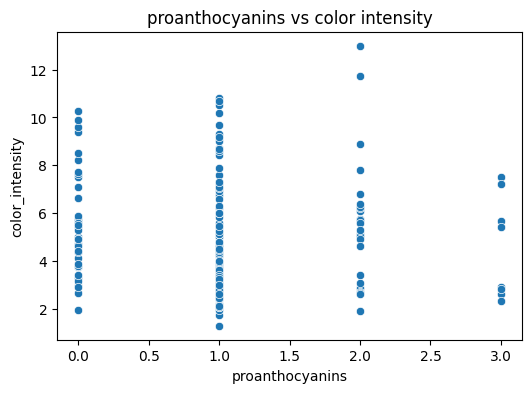

In [58]:
# example 1
plt.figure(figsize = (6,4))
plt.title("proanthocyanins vs color intensity")
sns.scatterplot(x=wine["proanthocyanins"], y = wine["color_intensity"])
plt.show()

In [69]:
# H0 = proanthocyanins and color intensity are independent
# Ha = proanthocyanins and color intensity are not independent

# checking whether to accpet the null hypothesis or reject it.
t_stat, t_p = ttest_ind(wine["proanthocyanins"], wine["color_intensity"])

print("T Statistical value: %.5f" %t_stat)
print("P value for t_test: %.5f" %t_p)

alpha = 0.05
if t_p > alpha:
    print("proanthocyanins and color intensity are independent(accepting h0) ")
else:
    print("proanthocyanins and color intensity dependent(rejecting h0)")

T Statistical value: -22.17444
P value for t_test: 0.00000
proanthocyanins and color intensity dependent(rejecting h0)


### Example2 

In [ ]:
# example 2
sns.histplot(x = wine["proline"], bins = 20, alpha = 0.6, legend = False, kde= True)
plt.show()

In [62]:
wine["proline"].mean()

746.8932584269663

In [63]:
sample1 = np.random.choice(wine["proline"], size = 34)
sample2 = np.random.choice(wine["proline"], size = 34)

In [67]:
# H0 = sample1 and sample2 are not equal
# Ha = sample1 and sample2 are equal

# checking whether to accpet the null hypothesis or reject it.
t_stat, t_p = ttest_ind(sample1, sample2)

print("T Statistical value: %.5f" %t_stat)
print("P value for t_test: %.5f" %t_p)

alpha = 0.05
if t_p > alpha:
    print("sample1 and sample2 are not equal (accepting h0) ")
else:
    print(" sample1 and sample2 are equal (rejecting h0)")

T Statistical value: 1.01628
P value for t_test: 0.31321
sample1 and sample2 are not equal (accepting h0) 


## Chi Square Test

In [76]:
data = {
    "Gender": np.random.choice(["Male", "Female"], 80),
    "Subject": np.random.choice(["Med", "Eng"], 80)
}

In [77]:
course = pd.DataFrame(data)
course.head(10)


,Gender,Subject
0,Female,Eng
1,Female,Eng
2,Male,Med
3,Female,Med
4,Male,Med
5,Female,Med
6,Female,Med
7,Male,Eng
8,Female,Eng
9,Female,Eng


In [80]:
crstb= pd.crosstab(course["Gender"], course["Subject"])

In [81]:
# H0 = More male are doing medical and females doing eng
# Ha = It is not true

chi_stat, chi_p, _, _= chi2_contingency(crstb)

print("Chi2 statistical value: %.5f" %chi_stat)
print("Chi2 p value: %.5f" %chi_p)

alpha = 0.5
if chi_p > alpha:
    print("More male are doing medical and females doing eng - accept H0")
else:
    print("IT is not true - accept Ha")

Chi2 statistical value: 0.86817
Chi2 p value: 0.35146
IT is not true - accept Ha
